In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk
from dask.distributed import Client

from abtem import FrozenPhonons, Probe, Potential, PlaneWave

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config
config.set({'device': 'cpu'})
config.set({'dask.lazy': True})
config.set({'fft': 'mkl'})
config.set({'fftw.threads': 1})

Runtime: 2.0 s per frozen phonon on 8-core Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz

In [2]:
client = Client()

In [3]:
silicon = bulk('Si', crystalstructure='diamond', cubic=True)
silicon *= (74,74,2)

In [6]:
frozen_phonons = FrozenPhonons(silicon, 8, {'Si':.0})

potential = Potential(frozen_phonons, 
                      gpts=2048,
                      projection='infinite', 
                      slice_thickness=.5)

wave = Probe(energy=100e3, semiangle_cutoff=9.4)

In [11]:
measurement = wave.multislice(potential, scan=(0,0)).diffraction_patterns().mean(0)

In [12]:
%%time
measurement.compute()

Wall time: 15.8 s


(<AxesSubplot:xlabel='Spatial frequency x [1 / Å]', ylabel='Spatial frequency y [1 / Å]'>,
 <matplotlib.image.AxesImage at 0x2b3720bc790>)

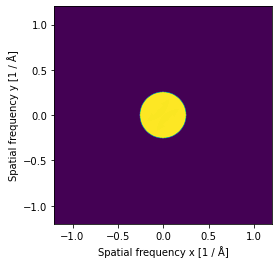

In [14]:
measurement.show()